In [62]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from collections import Counter
import csv
from collections import Counter


In [75]:
accident_num, accident_num_alc,accident_year_alc, accident_invage, accident_invtype,accident_year_hist, accident_num_invtype, \
accident_light_cond, accident_num_light  = ([] for i in range(9))

accident_light_cond_counts = Counter()
accident_impact = Counter()

with open('KSI-1.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    accident_num.append(int(row[0]))
    accident_year_hist.append(row[1]) # histogram
    accident_light_cond_counts[row[14]] += 1 # Day light
    accident_impact[row[17]] += 1 # Impact type


    if row[41] == "Yes": #Alcohol
        accident_year_alc.append(int(row[1]))
        accident_num_alc.append(int(row[0]))
    elif row[19] != "unknown": # Individual age
        accident_invage.append(row[19])
    elif row[18] != "": # Accident individual type
        accident_invtype.append(row[18])





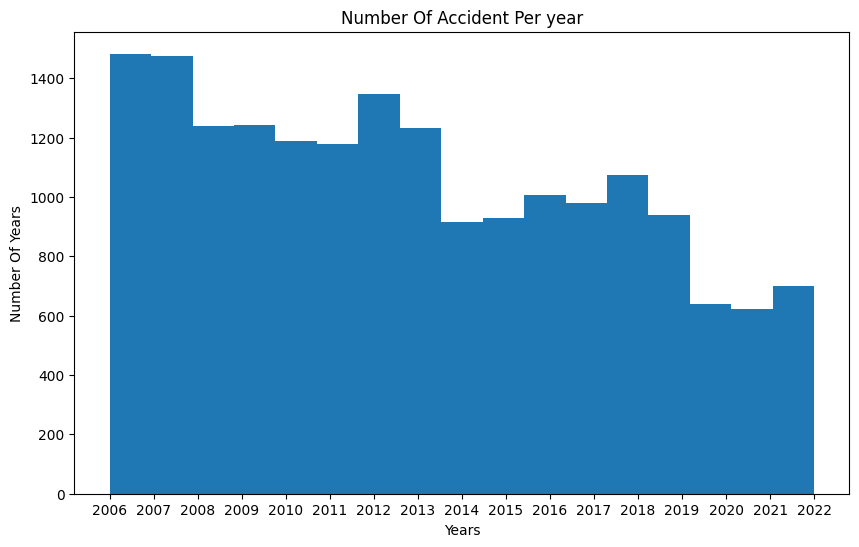

In [77]:
# Number of accident per year
plt.figure(figsize=(10,6))
plt.hist(accident_year_hist, bins= len(set(accident_year_hist)))
plt.title("Number Of Accident Per year")
plt.xlabel("Years")
plt.ylabel("Number Of Years")
plt.show()

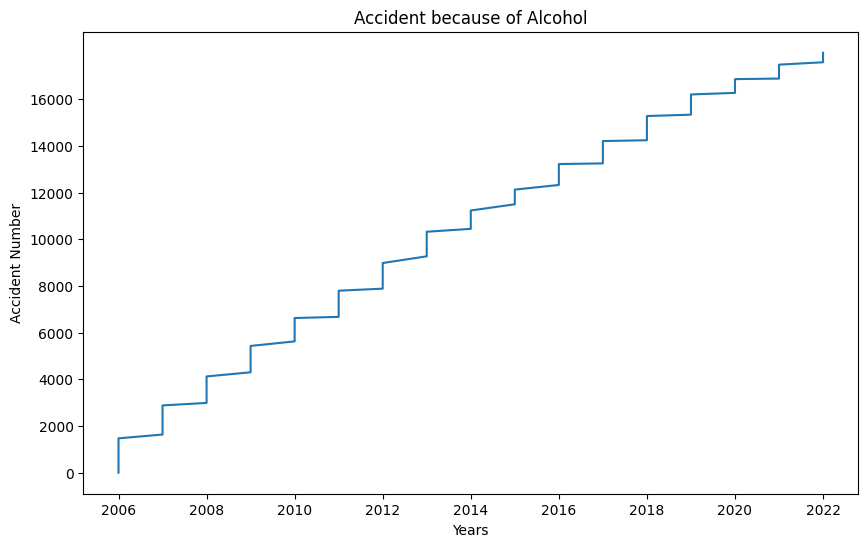

In [10]:
#********  ALCOHOL ***********
plt.figure(figsize = (10, 6))
plt.plot(accident_year_alc, accident_num_alc)
plt.title("Accident because of Alcohol")
plt.xlabel("Years")
plt.ylabel("Accident Number")
plt.yticks(range(0, max(accident_num_alc), 2000))
plt.show()

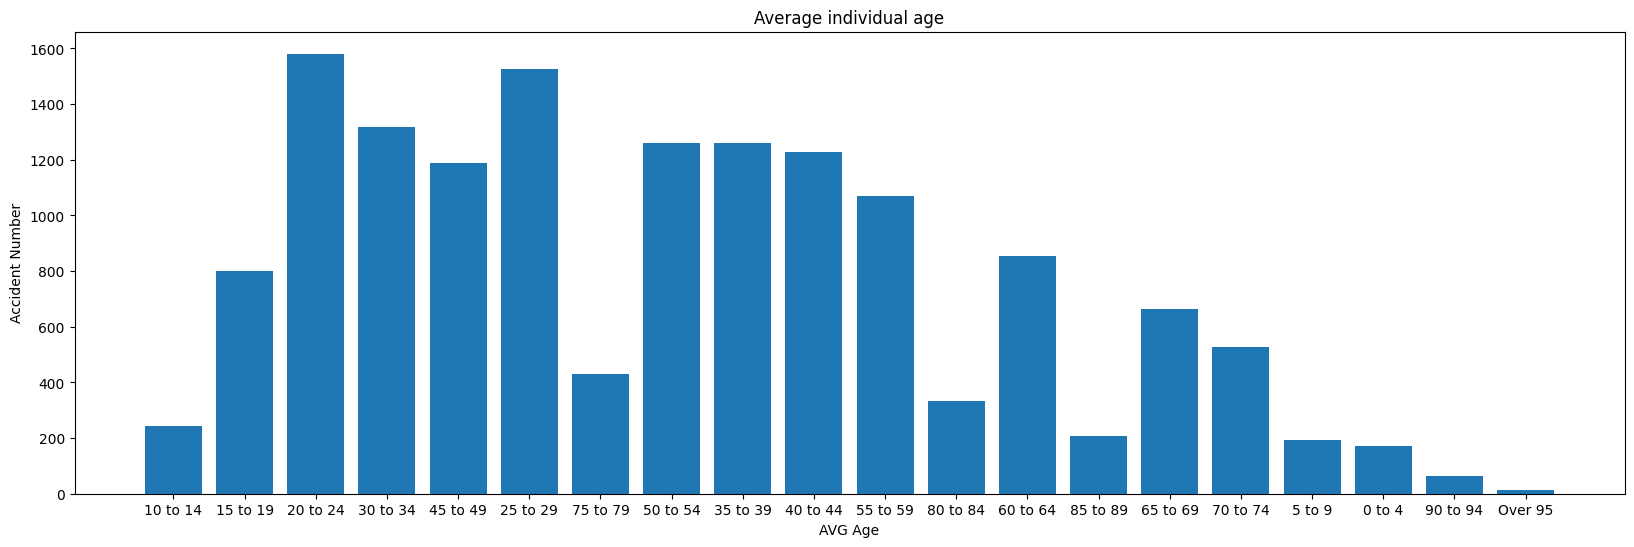

In [61]:
#********  INDIVIDUAL AGE ***********
age_counts = {}
for age in accident_invage:
    age_counts[age] = age_counts.get(age, 0) + 1

# Plot the bar chart
plt.figure(figsize=(20, 6))
plt.bar(age_counts.keys(), age_counts.values())
plt.title("Average individual age")
plt.xlabel("AVG Age")
plt.ylabel("Accident Number")
plt.show()

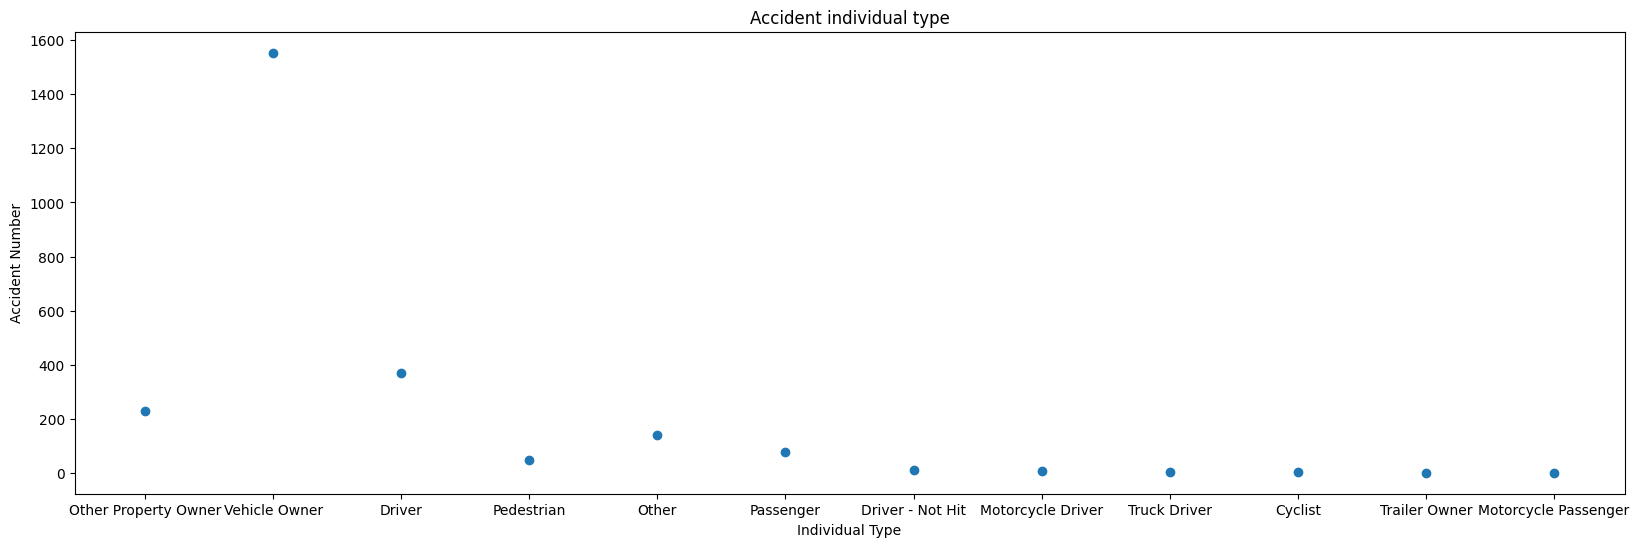

In [67]:
#********  ACCIDENT INDIVIDUAL TYPE ***********
invtype_counts = {}
for type in accident_invtype:
  invtype_counts[type] = invtype_counts.get(type, 0) + 1
plt.figure(figsize=(20,6))
plt.scatter(invtype_counts.keys(), invtype_counts.values())
plt.title("Accident individual type")
plt.xlabel("Individual Type")
plt.ylabel("Accident Number")
plt.show()

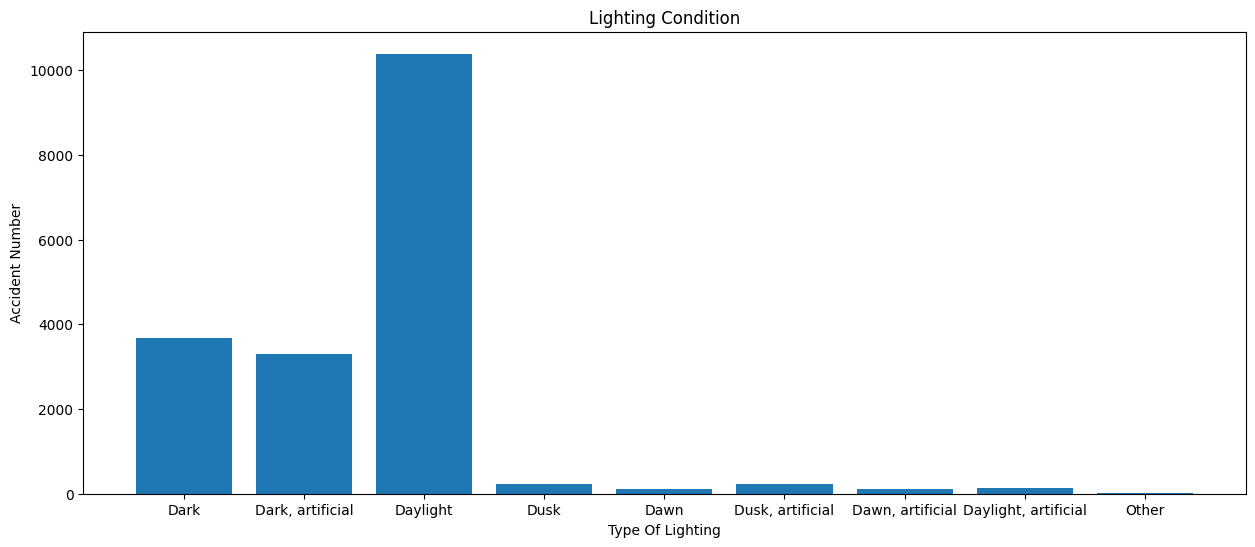

In [79]:
#******** lighting conditions ***********
plt.figure(figsize=(15, 6))
lights = list(accident_light_cond_counts.keys())
count = list(accident_light_cond_counts.values())
plt.bar(lights, count)
plt.title("Lighting Condition")
plt.xlabel("Type Of Lighting")
plt.ylabel("Accident Number")
plt.show()


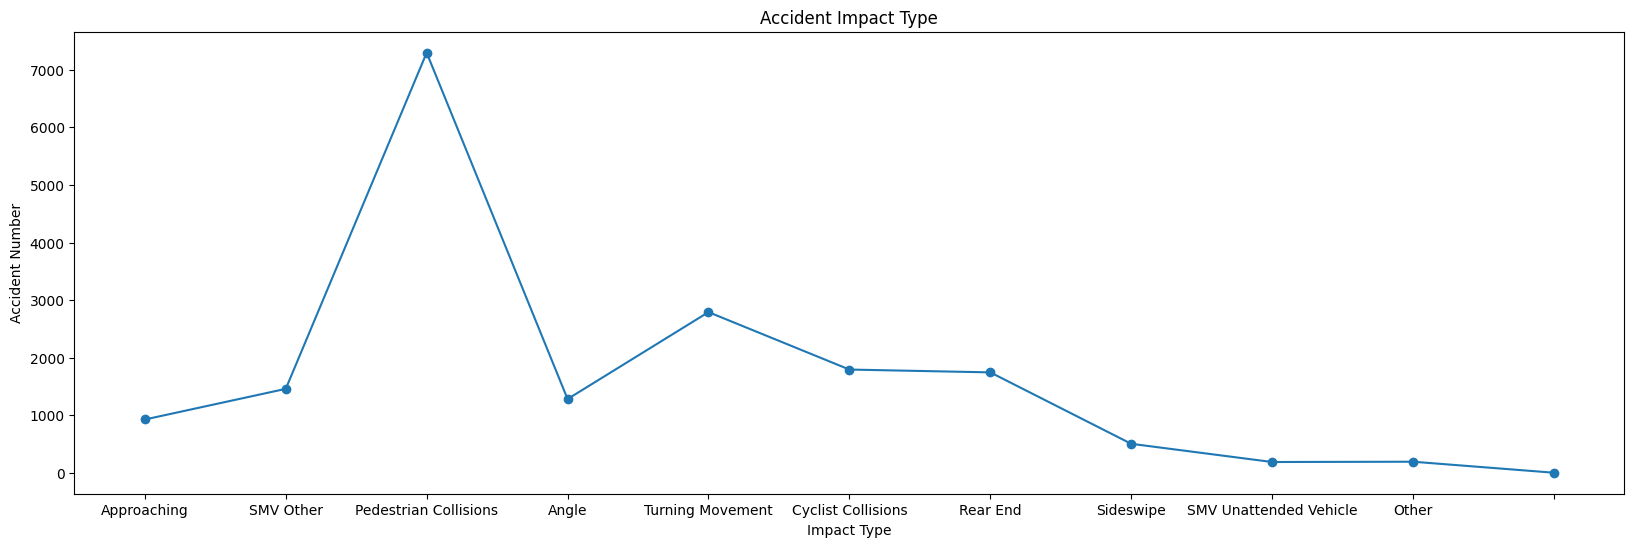

In [80]:
#******** Impact Type ***********
plt.figure(figsize=(20, 6))
plt.plot(list(accident_impact.keys()), list(accident_impact.values()), marker= "o")
plt.title("Accident Impact Type")
plt.xlabel("Impact Type")
plt.ylabel("Accident Number")
plt.show()